<a href="https://colab.research.google.com/github/hamsasriveni/daefmlproject/blob/main/violenceinwomen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/violence_data.csv.zip")
print(df)

       RecordID      Country Gender Demographics Question  \
0             1  Afghanistan      F        Marital status   
1             1  Afghanistan      F             Education   
2             1  Afghanistan      F             Education   
3             1  Afghanistan      F             Education   
4             1  Afghanistan      F        Marital status   
...         ...          ...    ...                   ...   
12595       210     Zimbabwe      M             Residence   
12596       280     Zimbabwe      M             Residence   
12597       280     Zimbabwe      M             Residence   
12598       350     Zimbabwe      M             Residence   
12599       350     Zimbabwe      M             Residence   

              Demographics Response                                 Question  \
0                     Never married                ... if she burns the food   
1                            Higher                ... if she burns the food   
2                         S

In [4]:
df.shape

(12600, 8)

In [5]:
df.size

100800

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [7]:
df.describe()

,RecordID,Value
count,12600.000000,11187.000000
mean,210.500000,19.762537
std,121.248024,16.986437
min,1.000000,0.000000
25%,105.750000,6.200000
50%,210.500000,14.900000
75%,315.250000,29.200000
max,420.000000,86.900000


In [8]:
df.sample(5) # display randon 5 rows

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
10095,337,Senegal,F,Age,15-24,... if she refuses to have sex with him,01/01/2017,33.1
6699,318,Liberia,F,Education,No education,... if she refuses to have sex with him,01/01/2013,13.4
12087,68,Yemen,F,Education,No education,... if she burns the food,01/01/2013,14.3
10521,129,South Africa,F,Residence,Urban,... if she argues with him,01/01/2016,1.4
4662,166,Ghana,M,Marital status,Never married,... if she goes out without telling him,01/01/2014,8.4


In [12]:
#Check for duplicates in the dataset
df.duplicated().sum()

0

In [13]:
df['Survey Year'] = pd.to_datetime(df['Survey Year'])

In [14]:
df['year'] = df['Survey Year'].dt.year
df['month'] = df['Survey Year'].dt.month
df['day'] = df['Survey Year'].dt.day
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,year,month,day
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,2015-01-01,NaN,2015,1,1
1,1,Afghanistan,F,Education,Higher,... if she burns the food,2015-01-01,10.1,2015,1,1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,2015-01-01,13.7,2015,1,1
3,1,Afghanistan,F,Education,Primary,... if she burns the food,2015-01-01,13.8,2015,1,1
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015-01-01,13.8,2015,1,1


In [15]:
df["year"].value_counts()

2013    1980
2015    1800
2014    1620
2016    1440
2017    1260
2012    1080
2011     720
2008     540
2006     360
2018     360
2010     180
2002     180
2009     180
2005     180
2003     180
2001     180
2000     180
2007     180
Name: year, dtype: int64

In [16]:
df = df.rename(columns={'Survey Year':'survey', 'Demographics Question': 'demoQ', 'Demographics Response': 'demoR'})

In [17]:
import plotly.express as px

fig = px.line(df.groupby(by='year').count().demoQ, title='Violence against Women by Year',markers=True)
fig.show()

In [18]:
df["day"].value_counts()

1    12600
Name: day, dtype: int64

In [19]:
fig = px.line(df.groupby(by='month').count().survey, title='Violence against Women by Month',markers=True)
fig.show()

In [23]:
df_2013 = df[df.year != 2014]
fig = px.line(df_2013.groupby(by='month').count().demoR, title='Violence against Women by month before 2014',markers=True)
fig.show()

In [24]:
fig = px.density_heatmap(df, x="year", y="month",title='Violence against Women Yearly')
fig.show()

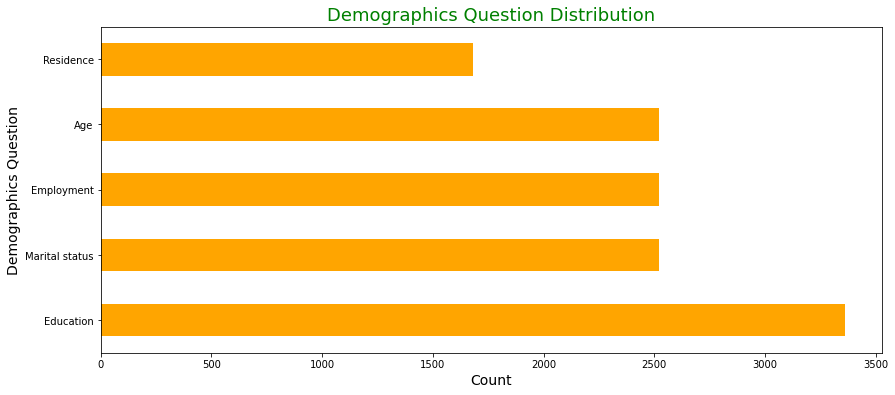

In [28]:
ax = df['demoQ'].value_counts().plot.barh(figsize=(14, 6), color='orange')
ax.set_title('Demographics Question Distribution',color='green', size=18)
ax.set_ylabel('Demographics Question', size=14)
ax.set_xlabel('Count', size=14);